<a href="https://colab.research.google.com/github/its-rajesh/Pattern-Recognition/blob/main/PRA1Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bayes classifier for 3 class classification**

Develop a Bayes classifier with Gaussian class conditional densities to
classify two datasets, each having 3 classes. The first dataset is linearly
separable, and the second is not. Use random 50% of data for training
and 50% for test. 

Build the following classifiers C1 -C4 :
- C1 : Covariance for all classes is Iσ2. Use the average of the sample
variances for all dimensions, for all classes, from the training data
as σ2
- C2 : Full but equal covariance for all classes, Σ. Use the average
of the sample covariance matrix from all classes in the train data
as Σ.
- C3 : Diagonal covariance matrix, distinct for each class. Use variances from the sample covariance matrix for each class.
- C4 : Full covariance matrix, distinct for each class. Use the sample
covariance matrix for each class.

### Imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
import pandas as pd
from matplotlib.colors import ListedColormap

In [2]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


### Reading Files

In [3]:
path = '/drive/My Drive/Pattern Recognition/Assignment1/assign1_data/q2/'
files = os.listdir(path)

*Linear Separable*

In [4]:
linearClass1 = pd.read_csv(path+'l_class1.txt', header=None)
linearClass2 = pd.read_csv(path+'l_class2.txt', header=None)
linearClass3 = pd.read_csv(path+'l_class3.txt', header = None)

linearClass1.shape, linearClass2.shape, linearClass3.shape

((500, 1), (500, 1), (500, 1))

Non Linear Separable

In [5]:
NonlinearClass1 = pd.read_csv(path+'nl_class1.txt', header=None)
NonlinearClass2 = pd.read_csv(path+'nl_class2.txt', header=None)
NonlinearClass3 = pd.read_csv(path+'nl_class3.txt', header = None)

NonlinearClass1.shape, NonlinearClass2.shape, NonlinearClass3.shape

((500, 1), (500, 1), (500, 1))

### Data Processing

Split data into x, y coordinates and test, training separated.

In [6]:
def extractXY(data):
  try:
    x, y = data.split(' ')
  except:
    x, y, z = data.split(' ')
  return float(x), float(y)

In [7]:
def get_data(data):
  xlist, ylist = [], []
  for i in data:
    x, y = extractXY(i)
    xlist.append(x)
    ylist.append(y)
  return xlist, ylist

*Linear Separable*

In [8]:
linearClass1x, linearClass1y = get_data(linearClass1[0])
linearClass2x, linearClass2y = get_data(linearClass2[0])
linearClass3x, linearClass3y = get_data(linearClass3[0])

In [9]:
train_lC1x, test_lc1x = linearClass1x[:len(linearClass1x)//2], linearClass1x[len(linearClass1x)//2:]
train_lC1y, test_lc1y = linearClass1y[:len(linearClass1y)//2], linearClass1y[len(linearClass1y)//2:]

train_lC2x, test_lc2x = linearClass2x[:len(linearClass2x)//2], linearClass2x[len(linearClass2x)//2:]
train_lC2y, test_lc2y = linearClass2y[:len(linearClass2y)//2], linearClass2y[len(linearClass2y)//2:]

train_lC3x, test_lc3x = linearClass3x[:len(linearClass3x)//2], linearClass3x[len(linearClass3x)//2:]
train_lC3y, test_lc3y = linearClass3y[:len(linearClass3y)//2], linearClass3y[len(linearClass3y)//2:]

*Non Linear Separable*

In [10]:
NonlinearClass1x, NonlinearClass1y = get_data(NonlinearClass1[0])
NonlinearClass2x, NonlinearClass2y = get_data(NonlinearClass2[0])
NonlinearClass3x, NonlinearClass3y = get_data(NonlinearClass3[0])

In [11]:
train_nlC1x, test_nlc1x = NonlinearClass1x[:len(NonlinearClass1x)//2], NonlinearClass1x[len(NonlinearClass1x)//2:]
train_nlC1y, test_nlc1y = NonlinearClass1y[:len(NonlinearClass1y)//2], NonlinearClass1y[len(NonlinearClass1y)//2:]

train_nlC2x, test_nlc2x = NonlinearClass2x[:len(NonlinearClass2x)//2], NonlinearClass2x[len(NonlinearClass2x)//2:]
train_nlC2y, test_nlc2y = NonlinearClass2y[:len(NonlinearClass2y)//2], NonlinearClass2y[len(NonlinearClass2y)//2:]

train_nlC3x, test_nlc3x = NonlinearClass3x[:len(NonlinearClass3x)//2], NonlinearClass3x[len(NonlinearClass3x)//2:]
train_nlC3y, test_nlc3y = NonlinearClass3y[:len(NonlinearClass3y)//2], NonlinearClass3y[len(NonlinearClass3y)//2:]

*Generating Ground truth*

In [12]:
test_datalx = np.concatenate([test_lc1x, test_lc2x,test_lc3x])
test_dataly = np.concatenate([test_lc1y, test_lc2y,test_lc3y])

Gtl1, Gtl2, Gtl3 = np.full(len(test_lc1x), 1), np.full(len(test_lc2x), 2), np.full(len(test_lc3x), 3)
Gtl = np.concatenate([Gtl1, Gtl2, Gtl3])

In [13]:
test_datanlx = np.concatenate([test_nlc1x, test_nlc2x,test_nlc3x])
test_datanly = np.concatenate([test_nlc1y, test_nlc2y,test_nlc3y])

Gtnl1, Gtnl2, Gtnl3 = np.full(len(test_nlc1x), 1), np.full(len(test_nlc2x), 2), np.full(len(test_nlc3x), 3)
Gtnl = np.concatenate([Gtl1, Gtl2, Gtl3])

*Calc min and max value for decision plots*

In [14]:
lminx = np.min([np.min(train_lC1x), np.min(train_lC2x), np.min(train_lC3x)])
lmaxx = np.max([np.max(train_lC1x), np.max(train_lC2x), np.max(train_lC3x)])

lminy = np.min([np.min(train_lC1y), np.min(train_lC2y), np.min(train_lC3y)])
lmaxy = np.max([np.max(train_lC1y), np.max(train_lC2y), np.max(train_lC3y)])

(lminx, lmaxx) , (lminy, lmaxy)

((-8.5974, 21.89), (-14.585, 16.859))

In [15]:
f = 3 #margin addition factor
dvlx, dvly = [], []
for i in range(int(lminx)-f, int(lmaxx)+f):
  for j in range(int(lminy)-f, int(lmaxy)+f):
    dvlx.append(i)
    dvly.append(j)

In [16]:
nlminx = np.min([np.min(train_nlC1x), np.min(train_nlC2x), np.min(train_nlC3x)])
nlmaxx = np.max([np.max(train_nlC1x), np.max(train_nlC2x), np.max(train_nlC3x)])

nlminy = np.min([np.min(train_nlC1y), np.min(train_nlC2y), np.min(train_nlC3y)])
nlmaxy = np.max([np.max(train_nlC1y), np.max(train_nlC2y), np.max(train_nlC3y)])

(nlminx, nlmaxx) , (nlminy, nlmaxy)

((-1.986585, 4.451719), (-1.472881, 1.197661))

In [17]:
f = 3 #margin addition factor
dvnlx, dvnly = [], []
for i in range(int(nlminx)-f, int(nlmaxx)+f):
  for j in range(int(nlminy)-f, int(nlmaxy)+f):
    dvnlx.append(i)
    dvnly.append(j)

### Visualization of Inputs

*Linear Separable*

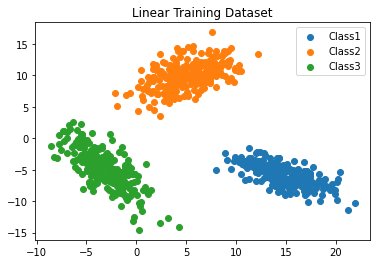

In [18]:
plt.scatter(train_lC1x, train_lC1y)
plt.scatter(train_lC2x, train_lC2y)
plt.scatter(train_lC3x, train_lC3y)
plt.title('Linear Training Dataset')
plt.legend(['Class1', 'Class2', 'Class3'])
plt.show()

*Non Linear Separable*

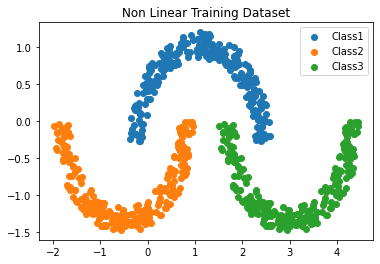

In [19]:
plt.scatter(train_nlC1x, train_nlC1y)
plt.scatter(train_nlC2x, train_nlC2y)
plt.scatter(train_nlC3x, train_nlC3y)
plt.title('Non Linear Training Dataset')
plt.legend(['Class1', 'Class2', 'Class3'])
plt.show()

### Mulitvariate Normal Density

In [20]:
def multivariateDensity(x, mu, cov):
  icov = np.linalg.inv(cov)
  num = np.exp(-0.5*np.dot((x-mu), np.dot(icov, (x-mu).T)))
  den = 2*np.pi*np.sqrt(np.linalg.det(cov))
  return num/den

### Confusion Matrix, Accuracy, Precision, Recall, and F1score

In [21]:
def confusion_matrix(y, ypred):
  c11, c12, c13, c21, c22, c23, c31, c32, c33 = 0, 0, 0, 0, 0, 0, 0, 0, 0
  for i in range(len(ypred)):
    if ypred[i] == 1 and y[i] == 1:
      c11 += 1
    elif ypred[i] == 2 and y[i] == 1:
      c12 += 1
    elif ypred[i] == 3 and y[i] == 1:
      c13 += 1
    elif ypred[i] == 2 and y[i] == 1:
      c21 += 1
    elif ypred[i] == 2 and y[i] == 2:
      c22 += 1
    elif ypred[i] == 2 and y[i] == 3:
      c23 += 1
    elif ypred[i] == 3 and y[i] == 1:
      c31 += 1
    elif ypred[i] == 3 and y[i] == 2:
      c32 += 1
    elif ypred[i] == 3 and y[i] == 3:
      c33 += 1

  return [[c11, c12, c13], [c21, c22, c23], [c31, c32, c33]]

In [22]:
def accuracy(cm):
  c11, c22, c33 = cm[0][0], cm[1][1], cm[2][2]
  return (c11+c22+c33)/750

In [23]:
def precision(cm):
  p1 = cm[0][0] / (cm[0][0]+(cm[0][1] + cm[0][2]))
  p2 = cm[1][1] / (cm[1][1]+(cm[1][0] + cm[1][2]))
  p3 = cm[2][2] / (cm[2][2]+(cm[2][0] + cm[2][1]))
  return (p1+p2+p3)/3

In [24]:
def recall(cm):
  r1 = cm[0][0] / (cm[0][0]+(cm[1][0] + cm[2][0]))
  r2 = cm[1][1] / (cm[1][1]+(cm[0][1] + cm[2][1]))
  r3 = cm[2][2] / (cm[2][2]+(cm[0][2] + cm[1][2]))
  return (r1+r2+r3)/3

In [25]:
def Fmeasure(cm):
  p1 = cm[0][0] / (cm[0][0]+(cm[0][1] + cm[0][2]))
  p2 = cm[1][1] / (cm[1][1]+(cm[1][0] + cm[1][2]))
  p3 = cm[2][2] / (cm[2][2]+(cm[2][0] + cm[2][1]))
  r1 = cm[0][0] / (cm[0][0]+(cm[1][0] + cm[2][0]))
  r2 = cm[1][1] / (cm[1][1]+(cm[0][1] + cm[2][1]))
  r3 = cm[2][2] / (cm[2][2]+(cm[0][2] + cm[1][2]))
  fm1 = 2*p1*r1/(p1+r1)
  fm2 = 2*p2*r2/(p2+r2)
  fm3 = 2*p3*r3/(p3+r3)
  return (fm1+fm2+fm3)/3

# Bayes Classifier for Linear Separable Dataset

### Prior, Mean, Vairance and Covariance

In [66]:
priorlC1=len(train_lC1x)/(len(train_lC1x)+len(train_lC2x)+len(train_lC3x))
priorlC2=len(train_lC2x)/(len(train_lC1x)+len(train_lC2x)+len(train_lC3x))
priorlC3=len(train_lC3x)/(len(train_lC1x)+len(train_lC2x)+len(train_lC3x))

In [67]:
meanlc1 = np.array([np.mean(train_lC1x), np.mean(train_lC1y)])
meanlc2 = np.array([np.mean(train_lC2x), np.mean(train_lC2y)])
meanlc3 = np.array([np.mean(train_lC3x), np.mean(train_lC3y)])

In [68]:
varlc1 = np.array([np.var(train_lC1x), np.var(train_lC1y)])
varlc2 = np.array([np.var(train_lC2x), np.var(train_lC2y)])
varlc3 = np.array([np.var(train_lC3x), np.var(train_lC3y)])

In [69]:
covlc1 = np.cov([train_lC1x, train_lC1y])
covlc2 = np.cov([train_lC2x, train_lC2y])
covlc3 = np.cov([train_lC3x, train_lC3y])

### Classifier 1

*Covariance for all classes is Iσ2. Use the average of the sample
variances for all dimensions, for all classes, from the training data
as σ2*

In [30]:
AvgVarl = (varlc1+varlc2+varlc3)/3
classifier1_cov = np.identity(2)*AvgVarl

In [31]:
def classifier1(x, y, mu, cov, prior):
  mu1, mu2, mu3 = mu
  prior1, prior2, prior3 = prior 
  classifier1_pred = []
  for i in range(len(x)):
    xi = [x[i], y[i]]
    lh1 = multivariateDensity(xi, mu1, cov)
    lh2 = multivariateDensity(xi, mu2, cov)
    lh3 = multivariateDensity(xi, mu3, cov)

    posterior1 = (prior1 * lh1) / (lh1 * prior1 + lh2 * prior2 + lh3 * prior3)
    posterior2 = (prior2 * lh2) / (lh1 * prior1 + lh2 * prior2 + lh3 * prior3)
    posterior3 = (prior3 * lh3) / (lh1 * prior1 + lh2 * prior2 + lh3 * prior3)

    posterior = np.array([posterior1, posterior2, posterior3])
    pred = np.argmax(posterior)
    classifier1_pred.append(pred)

  return classifier1_pred

In [32]:
meanl = (meanlc1, meanlc2, meanlc3)
priorl = (priorlC1, priorlC2, priorlC3)
classifier1_pred = classifier1(test_datalx, test_dataly, meanl, classifier1_cov, priorl)
classifier1_pred = [i+1 for i in classifier1_pred]

In [35]:
C1cm = confusion_matrix(classifier1_pred, Gtl)
print('CONFUSION MATRIX\n', C1cm)

CONFUSION MATRIX
 [[250, 0, 0], [0, 250, 0], [0, 0, 250]]


In [43]:
C1_Accuracy = accuracy(C1cm)
C1_precision = precision(C1cm)
C1_recall = recall(C1cm)
C1_Fmeasure = Fmeasure(C1cm)
print('CLASSIFIER1 SCORES\nAccuracy : {}\nPrecision = {}\nRecall = {}\nF Measure = {}'.format(C1_Accuracy, C1_precision, C1_recall, C1_Fmeasure))

CLASSIFIER1 SCORES
Accuracy : 1.0
Precision = 1.0
Recall = 1.0
F Measure = 1.0


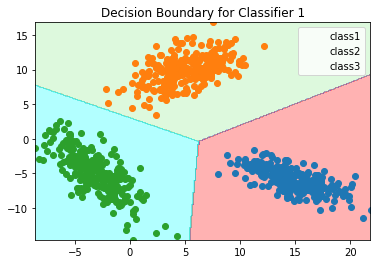

In [53]:
markers = ('s', 'x', 'o', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(dvly))])
resolution = 0.1


xx1, xx2 = np.meshgrid(np.arange(lminx, lmaxx, resolution), np.arange(lminy, lmaxy, resolution))

Z = np.array(classifier1(xx1.ravel(), xx2.ravel(), meanl, classifier1_cov, priorl))
Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

plt.legend(['class1', 'class2', 'class3'])
plt.scatter(train_lC1x, train_lC1y)
plt.scatter(train_lC2x, train_lC2y)
plt.scatter(train_lC3x, train_lC3y)
plt.title('Decision Boundary for Classifier 1')
plt.show()

### Classifier 2

*Full but equal covariance for all classes, Σ. Use the average of the sample covariance matrix from all classes in the train data as Σ.*

In [54]:
AvgCovl = (covlc1+covlc2+covlc3)/3

In [55]:
def classifier2(x, y, mu, cov, prior):
  mu1, mu2, mu3 = mu
  prior1, prior2, prior3 = prior 
  classifier2_pred = []
  for i in range(len(x)):
    xi = [x[i], y[i]]
    lh1 = multivariateDensity(xi, mu1, cov)
    lh2 = multivariateDensity(xi, mu2, cov)
    lh3 = multivariateDensity(xi, mu3, cov)

    posterior1 = (prior1 * lh1) / (lh1 * prior1 + lh2 * prior2 + lh3 * prior3)
    posterior2 = (prior2 * lh2) / (lh1 * prior1 + lh2 * prior2 + lh3 * prior3)
    posterior3 = (prior3 * lh3) / (lh1 * prior1 + lh2 * prior2 + lh3 * prior3)

    posterior = np.array([posterior1, posterior2, posterior3])
    pred = np.argmax(posterior)
    classifier2_pred.append(pred)

  return classifier2_pred

In [56]:
meanl = (meanlc1, meanlc2, meanlc3)
priorl = (priorlC1, priorlC2, priorlC3)
classifier2_pred = classifier2(test_datalx, test_dataly, meanl, AvgCovl, priorl)
classifier2_pred = [i+1 for i in classifier2_pred]

In [57]:
C2cm = confusion_matrix(classifier2_pred, Gtl)
print('CONFUSION MATRIX\n', C2cm)

CONFUSION MATRIX
 [[250, 0, 0], [0, 250, 0], [0, 0, 250]]


In [58]:
C2_Accuracy = accuracy(C2cm)
C2_precision = precision(C2cm)
C2_recall = recall(C2cm)
C2_Fmeasure = Fmeasure(C2cm)
print('CLASSIFIER2 SCORES\nAccuracy : {}\nPrecision = {}\nRecall = {}\nF Measure = {}'.format(C2_Accuracy, C2_precision, C2_recall, C2_Fmeasure))

CLASSIFIER2 SCORES
Accuracy : 1.0
Precision = 1.0
Recall = 1.0
F Measure = 1.0


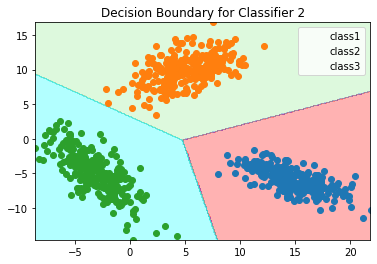

In [59]:
markers = ('s', 'x', 'o', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(dvly))])
resolution = 0.1


xx1, xx2 = np.meshgrid(np.arange(lminx, lmaxx, resolution), np.arange(lminy, lmaxy, resolution))

Z = np.array(classifier2(xx1.ravel(), xx2.ravel(), meanl, AvgCovl, priorl))
Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

plt.legend(['class1', 'class2', 'class3'])
plt.scatter(train_lC1x, train_lC1y)
plt.scatter(train_lC2x, train_lC2y)
plt.scatter(train_lC3x, train_lC3y)
plt.title('Decision Boundary for Classifier 2')
plt.show()

### Classifier 3

*Diagonal covariance matrix, distinct for each class. Use variances from the sample covariance matrix for each class*

In [116]:
dcov1 = covlc1.copy()
dcov1[0][1] = 0
dcov1[1][0] = 0

dcov2 = covlc2.copy()
dcov2[0][1] = 0
dcov2[1][0] = 0

dcov3 = covlc3.copy()
dcov3[0][1] = 0
dcov3[1][0] = 0

classifier3_cov = (dcov1, dcov2, dcov3)

In [117]:
def classifier3(x, y, mu, cov, prior):
  mu1, mu2, mu3 = mu
  prior1, prior2, prior3 = prior 
  cov1, cov2, cov3 = cov
  classifier3_pred = []
  for i in range(len(x)):
    xi = [x[i], y[i]]
    lh1 = multivariateDensity(xi, mu1, cov1)
    lh2 = multivariateDensity(xi, mu2, cov2)
    lh3 = multivariateDensity(xi, mu3, cov3)

    posterior1 = (prior1 * lh1) / (lh1 * prior1 + lh2 * prior2 + lh3 * prior3)
    posterior2 = (prior2 * lh2) / (lh1 * prior1 + lh2 * prior2 + lh3 * prior3)
    posterior3 = (prior3 * lh3) / (lh1 * prior1 + lh2 * prior2 + lh3 * prior3)

    posterior = np.array([posterior1, posterior2, posterior3])
    pred = np.argmax(posterior)
    classifier3_pred.append(pred)

  return classifier3_pred

In [118]:
meanl = (meanlc1, meanlc2, meanlc3)
priorl = (priorlC1, priorlC2, priorlC3)
classifier3_pred = classifier3(test_datalx, test_dataly, meanl, classifier3_cov, priorl)
classifier3_pred = [i+1 for i in classifier3_pred]

In [119]:
C3cm = confusion_matrix(classifier3_pred, Gtl)
print('CONFUSION MATRIX\n', C3cm)

CONFUSION MATRIX
 [[250, 0, 0], [0, 250, 0], [0, 0, 250]]


In [120]:
C3_Accuracy = accuracy(C3cm)
C3_precision = precision(C3cm)
C3_recall = recall(C3cm)
C3_Fmeasure = Fmeasure(C3cm)
print('CLASSIFIER3 SCORES\nAccuracy : {}\nPrecision = {}\nRecall = {}\nF Measure = {}'.format(C3_Accuracy, C3_precision, C3_recall, C3_Fmeasure))

CLASSIFIER3 SCORES
Accuracy : 1.0
Precision = 1.0
Recall = 1.0
F Measure = 1.0


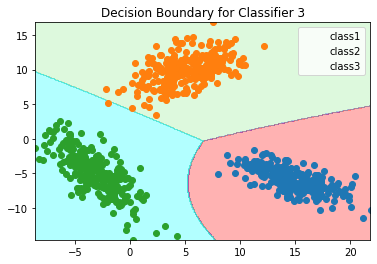

In [127]:
markers = ('s', 'x', 'o', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(dvly))])
resolution = 0.1


xx1, xx2 = np.meshgrid(np.arange(lminx, lmaxx, resolution), np.arange(lminy, lmaxy, resolution))

Z = np.array(classifier3(xx1.ravel(), xx2.ravel(), meanl, classifier3_cov, priorl))
Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

plt.legend(['class1', 'class2', 'class3'])
plt.scatter(train_lC1x, train_lC1y)
plt.scatter(train_lC2x, train_lC2y)
plt.scatter(train_lC3x, train_lC3y)
plt.title('Decision Boundary for Classifier 3')
plt.show()

### Classifier 4
*Full covariance matrix, distinct for each class. Use the sample covariance matrix for each class.*

In [83]:
classifier4_cov = (covlc1, covlc2, covlc3)

In [85]:
def classifier4(x, y, mu, cov, prior):
  mu1, mu2, mu3 = mu
  prior1, prior2, prior3 = prior 
  cov1, cov2, cov3 = cov
  classifier3_pred = []
  for i in range(len(x)):
    xi = [x[i], y[i]]
    lh1 = multivariateDensity(xi, mu1, cov1)
    lh2 = multivariateDensity(xi, mu2, cov2)
    lh3 = multivariateDensity(xi, mu3, cov3)

    posterior1 = (prior1 * lh1) / (lh1 * prior1 + lh2 * prior2 + lh3 * prior3)
    posterior2 = (prior2 * lh2) / (lh1 * prior1 + lh2 * prior2 + lh3 * prior3)
    posterior3 = (prior3 * lh3) / (lh1 * prior1 + lh2 * prior2 + lh3 * prior3)

    posterior = np.array([posterior1, posterior2, posterior3])
    pred = np.argmax(posterior)
    classifier3_pred.append(pred)

  return classifier3_pred

In [86]:
meanl = (meanlc1, meanlc2, meanlc3)
priorl = (priorlC1, priorlC2, priorlC3)
classifier4_pred = classifier4(test_datalx, test_dataly, meanl, classifier4_cov, priorl)
classifier4_pred = [i+1 for i in classifier4_pred]

In [87]:
C4cm = confusion_matrix(classifier4_pred, Gtl)
print('CONFUSION MATRIX\n', C4cm)

CONFUSION MATRIX
 [[250, 0, 0], [0, 250, 0], [0, 0, 250]]


In [88]:
C4_Accuracy = accuracy(C4cm)
C4_precision = precision(C4cm)
C4_recall = recall(C4cm)
C4_Fmeasure = Fmeasure(C4cm)
print('CLASSIFIER4 SCORES\nAccuracy : {}\nPrecision = {}\nRecall = {}\nF Measure = {}'.format(C4_Accuracy, C4_precision, C4_recall, C4_Fmeasure))

CLASSIFIER4 SCORES
Accuracy : 1.0
Precision = 1.0
Recall = 1.0
F Measure = 1.0


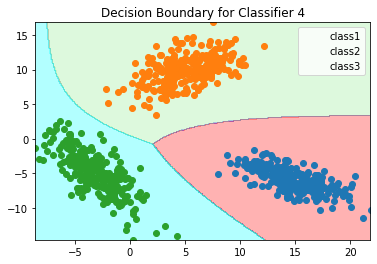

In [135]:
markers = ('s', 'x', 'o', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(dvly))])
resolution = 0.1


xx1, xx2 = np.meshgrid(np.arange(lminx, lmaxx, resolution), np.arange(lminy, lmaxy, resolution))

Z = np.array(classifier3(xx1.ravel(), xx2.ravel(), meanl, classifier4_cov, priorl))
Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

plt.legend(['class1', 'class2', 'class3'])
plt.scatter(train_lC1x, train_lC1y)
plt.scatter(train_lC2x, train_lC2y)
plt.scatter(train_lC3x, train_lC3y)
plt.title('Decision Boundary for Classifier 4')
plt.show()

# Bayes Classifier for Non Linearly Separable Dataset

### Prior, Mean, Variance, and Covariance

In [26]:
priornlC1=len(train_nlC1x)/(len(train_nlC1x)+len(train_nlC2x)+len(train_nlC3x))
priornlC2=len(train_nlC2x)/(len(train_nlC1x)+len(train_nlC2x)+len(train_nlC3x))
priornlC3=len(train_nlC3x)/(len(train_nlC1x)+len(train_nlC2x)+len(train_nlC3x))

In [27]:
meannlc1 = np.array([np.mean(train_nlC1x), np.mean(train_nlC1y)])
meannlc2 = np.array([np.mean(train_nlC2x), np.mean(train_nlC2y)])
meannlc3 = np.array([np.mean(train_nlC3x), np.mean(train_nlC3y)])

In [28]:
varnlc1 = np.array([np.var(train_nlC1x), np.var(train_nlC1y)])
varnlc2 = np.array([np.var(train_nlC2x), np.var(train_nlC2y)])
varnlc3 = np.array([np.var(train_nlC3x), np.var(train_nlC3y)])

In [29]:
covnlc1 = np.cov([train_nlC1x, train_nlC1y])
covnlc2 = np.cov([train_nlC2x, train_nlC2y])
covnlc3 = np.cov([train_nlC3x, train_nlC3y])

### Classifier 1
*Covariance for all classes is Iσ2. Use the average of the sample
variances for all dimensions, for all classes, from the training data
as σ2*

In [30]:
AvgVarnl = (varnlc1+varnlc2+varnlc3)/3
classifiern1_cov = np.identity(2)*AvgVarnl

In [31]:
def classifier1(x, y, mu, cov, prior):
  mu1, mu2, mu3 = mu
  prior1, prior2, prior3 = prior 
  classifier1_pred = []
  for i in range(len(x)):
    xi = [x[i], y[i]]
    lh1 = multivariateDensity(xi, mu1, cov)
    lh2 = multivariateDensity(xi, mu2, cov)
    lh3 = multivariateDensity(xi, mu3, cov)

    posterior1 = (prior1 * lh1) / (lh1 * prior1 + lh2 * prior2 + lh3 * prior3)
    posterior2 = (prior2 * lh2) / (lh1 * prior1 + lh2 * prior2 + lh3 * prior3)
    posterior3 = (prior3 * lh3) / (lh1 * prior1 + lh2 * prior2 + lh3 * prior3)

    posterior = np.array([posterior1, posterior2, posterior3])
    pred = np.argmax(posterior)
    classifier1_pred.append(pred)

  return classifier1_pred

In [32]:
meannl = (meannlc1, meannlc2, meannlc3)
priornl = (priornlC1, priornlC2, priornlC3)
classifiern1_pred = classifier1(test_datanlx, test_datanly, meannl, classifiern1_cov, priornl)
classifiern1_pred = [i+1 for i in classifiern1_pred]

In [33]:
Cn1cm = confusion_matrix(classifiern1_pred, Gtnl)
print('CONFUSION MATRIX\n', Cn1cm)

CONFUSION MATRIX
 [[222, 16, 22], [0, 234, 0], [0, 0, 228]]


In [34]:
Cn1_Accuracy = accuracy(Cn1cm)
Cn1_precision = precision(Cn1cm)
Cn1_recall = recall(Cn1cm)
Cn1_Fmeasure = Fmeasure(Cn1cm)
print('CLASSIFIER1 SCORES\nAccuracy : {}\nPrecision = {}\nRecall = {}\nF Measure = {}'.format(Cn1_Accuracy, Cn1_precision, Cn1_recall, Cn1_Fmeasure))

CLASSIFIER1 SCORES
Accuracy : 0.912
Precision = 0.9512820512820513
Recall = 0.9493333333333333
F Measure = 0.9473596232946537


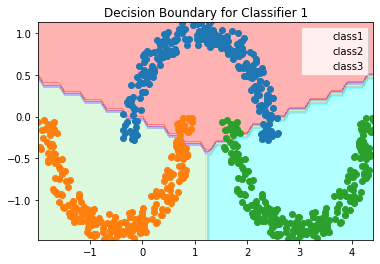

In [35]:
markers = ('s', 'x', 'o', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(dvnly))])
resolution = 0.1


xx1, xx2 = np.meshgrid(np.arange(nlminx, nlmaxx, resolution), np.arange(nlminy, nlmaxy, resolution))

Z = np.array(classifier1(xx1.ravel(), xx2.ravel(), meannl, classifiern1_cov, priornl))
Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

plt.legend(['class1', 'class2', 'class3'])
plt.scatter(train_nlC1x, train_nlC1y)
plt.scatter(train_nlC2x, train_nlC2y)
plt.scatter(train_nlC3x, train_nlC3y)
plt.title('Decision Boundary for Classifier 1')
plt.show()

### Classifier 2

*Full but equal covariance for all classes, Σ. Use the average of the sample covariance matrix from all classes in the train data as Σ.*

In [36]:
AvgCovnl = (covnlc1+covnlc2+covnlc3)/3

In [37]:
def classifier2(x, y, mu, cov, prior):
  mu1, mu2, mu3 = mu
  prior1, prior2, prior3 = prior 
  classifier2_pred = []
  for i in range(len(x)):
    xi = [x[i], y[i]]
    lh1 = multivariateDensity(xi, mu1, cov)
    lh2 = multivariateDensity(xi, mu2, cov)
    lh3 = multivariateDensity(xi, mu3, cov)

    posterior1 = (prior1 * lh1) / (lh1 * prior1 + lh2 * prior2 + lh3 * prior3)
    posterior2 = (prior2 * lh2) / (lh1 * prior1 + lh2 * prior2 + lh3 * prior3)
    posterior3 = (prior3 * lh3) / (lh1 * prior1 + lh2 * prior2 + lh3 * prior3)

    posterior = np.array([posterior1, posterior2, posterior3])
    pred = np.argmax(posterior)
    classifier2_pred.append(pred)

  return classifier2_pred

In [38]:
meannl = (meannlc1, meannlc2, meannlc3)
priornl = (priornlC1, priornlC2, priornlC3)
classifiern2_pred = classifier2(test_datanlx, test_datanly, meannl, AvgCovnl, priornl)
classifiern2_pred = [i+1 for i in classifiern2_pred]

In [39]:
Cn2cm = confusion_matrix(classifiern2_pred, Gtnl)
print('CONFUSION MATRIX\n', Cn2cm)

CONFUSION MATRIX
 [[222, 16, 22], [0, 234, 0], [0, 0, 228]]


In [40]:
Cn2_Accuracy = accuracy(Cn2cm)
Cn2_precision = precision(Cn2cm)
Cn2_recall = recall(Cn2cm)
Cn2_Fmeasure = Fmeasure(Cn2cm)
print('CLASSIFIER2 SCORES\nAccuracy : {}\nPrecision = {}\nRecall = {}\nF Measure = {}'.format(Cn2_Accuracy, Cn2_precision, Cn2_recall, Cn2_Fmeasure))

CLASSIFIER2 SCORES
Accuracy : 0.912
Precision = 0.9512820512820513
Recall = 0.9493333333333333
F Measure = 0.9473596232946537


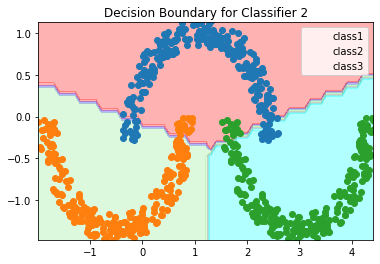

In [41]:
markers = ('s', 'x', 'o', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(dvnly))])
resolution = 0.1


xx1, xx2 = np.meshgrid(np.arange(nlminx, nlmaxx, resolution), np.arange(nlminy, nlmaxy, resolution))

Z = np.array(classifier2(xx1.ravel(), xx2.ravel(), meannl, AvgCovnl, priornl))
Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

plt.legend(['class1', 'class2', 'class3'])
plt.scatter(train_nlC1x, train_nlC1y)
plt.scatter(train_nlC2x, train_nlC2y)
plt.scatter(train_nlC3x, train_nlC3y)
plt.title('Decision Boundary for Classifier 2')
plt.show()

### Classifier 3
*Diagonal covariance matrix, distinct for each class. Use variances from the sample covariance matrix for each class*

In [42]:
dcovn1 = covnlc1.copy()
dcovn1[0][1] = 0
dcovn1[1][0] = 0

dcovn2 = covnlc2.copy()
dcovn2[0][1] = 0
dcovn2[1][0] = 0

dcovn3 = covnlc3.copy()
dcovn3[0][1] = 0
dcovn3[1][0] = 0

classifiern3_cov = (dcovn1, dcovn2, dcovn3)

In [43]:
def classifier3(x, y, mu, cov, prior):
  mu1, mu2, mu3 = mu
  prior1, prior2, prior3 = prior 
  cov1, cov2, cov3 = cov
  classifier3_pred = []
  for i in range(len(x)):
    xi = [x[i], y[i]]
    lh1 = multivariateDensity(xi, mu1, cov1)
    lh2 = multivariateDensity(xi, mu2, cov2)
    lh3 = multivariateDensity(xi, mu3, cov3)

    posterior1 = (prior1 * lh1) / (lh1 * prior1 + lh2 * prior2 + lh3 * prior3)
    posterior2 = (prior2 * lh2) / (lh1 * prior1 + lh2 * prior2 + lh3 * prior3)
    posterior3 = (prior3 * lh3) / (lh1 * prior1 + lh2 * prior2 + lh3 * prior3)

    posterior = np.array([posterior1, posterior2, posterior3])
    pred = np.argmax(posterior)
    classifier3_pred.append(pred)

  return classifier3_pred

In [44]:
meannl = (meannlc1, meannlc2, meannlc3)
priornl = (priornlC1, priornlC2, priornlC3)
classifiern3_pred = classifier3(test_datanlx, test_datanly, meannl, classifiern3_cov, priornl)
classifiern3_pred = [i+1 for i in classifiern3_pred]

In [45]:
Cn3cm = confusion_matrix(classifiern3_pred, Gtnl)
print('CONFUSION MATRIX\n', Cn3cm)

CONFUSION MATRIX
 [[220, 12, 21], [0, 238, 0], [0, 0, 229]]


In [46]:
Cn3_Accuracy = accuracy(Cn3cm)
Cn3_precision = precision(Cn3cm)
Cn3_recall = recall(Cn3cm)
Cn3_Fmeasure = Fmeasure(Cn3cm)
print('CLASSIFIER3 SCORES\nAccuracy : {}\nPrecision = {}\nRecall = {}\nF Measure = {}'.format(Cn3_Accuracy, Cn3_precision, Cn3_recall, Cn3_Fmeasure))

CLASSIFIER3 SCORES
Accuracy : 0.916
Precision = 0.9565217391304347
Recall = 0.956
F Measure = 0.9539336860293995


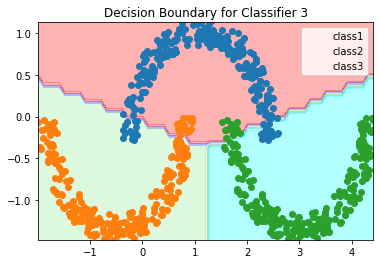

In [47]:
markers = ('s', 'x', 'o', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(dvnly))])
resolution = 0.1


xx1, xx2 = np.meshgrid(np.arange(nlminx, nlmaxx, resolution), np.arange(nlminy, nlmaxy, resolution))

Z = np.array(classifier3(xx1.ravel(), xx2.ravel(), meannl, classifiern3_cov, priornl))
Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

plt.legend(['class1', 'class2', 'class3'])
plt.scatter(train_nlC1x, train_nlC1y)
plt.scatter(train_nlC2x, train_nlC2y)
plt.scatter(train_nlC3x, train_nlC3y)
plt.title('Decision Boundary for Classifier 3')
plt.show()

### Classifier 4
*Full covariance matrix, distinct for each class. Use the sample covariance matrix for each class.*

In [48]:
classifiern4_cov = (covnlc1, covnlc2, covnlc3)

In [49]:
def classifier4(x, y, mu, cov, prior):
  mu1, mu2, mu3 = mu
  prior1, prior2, prior3 = prior 
  cov1, cov2, cov3 = cov
  classifier3_pred = []
  for i in range(len(x)):
    xi = [x[i], y[i]]
    lh1 = multivariateDensity(xi, mu1, cov1)
    lh2 = multivariateDensity(xi, mu2, cov2)
    lh3 = multivariateDensity(xi, mu3, cov3)

    posterior1 = (prior1 * lh1) / (lh1 * prior1 + lh2 * prior2 + lh3 * prior3)
    posterior2 = (prior2 * lh2) / (lh1 * prior1 + lh2 * prior2 + lh3 * prior3)
    posterior3 = (prior3 * lh3) / (lh1 * prior1 + lh2 * prior2 + lh3 * prior3)

    posterior = np.array([posterior1, posterior2, posterior3])
    pred = np.argmax(posterior)
    classifier3_pred.append(pred)

  return classifier3_pred

In [50]:
meannl = (meannlc1, meannlc2, meannlc3)
priornl = (priornlC1, priornlC2, priornlC3)
classifiern4_pred = classifier4(test_datanlx, test_datanly, meannl, classifiern4_cov, priornl)
classifiern4_pred = [i+1 for i in classifiern4_pred]

In [51]:
Cn4cm = confusion_matrix(classifiern4_pred, Gtnl)
print('CONFUSION MATRIX\n', Cn4cm)

CONFUSION MATRIX
 [[221, 9, 22], [0, 241, 0], [0, 0, 228]]


In [52]:
Cn4_Accuracy = accuracy(Cn4cm)
Cn4_precision = precision(Cn4cm)
Cn4_recall = recall(Cn4cm)
Cn4_Fmeasure = Fmeasure(Cn4cm)
print('CLASSIFIER4 SCORES\nAccuracy : {}\nPrecision = {}\nRecall = {}\nF Measure = {}'.format(Cn4_Accuracy, Cn4_precision, Cn4_recall, Cn4_Fmeasure))

CLASSIFIER4 SCORES
Accuracy : 0.92
Precision = 0.958994708994709
Recall = 0.9586666666666667
F Measure = 0.9567019481488487


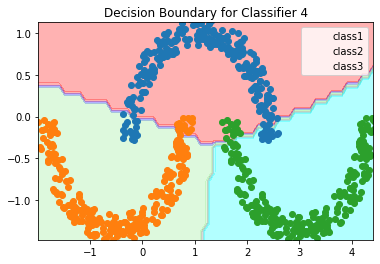

In [53]:
markers = ('s', 'x', 'o', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(dvnly))])
resolution = 0.1


xx1, xx2 = np.meshgrid(np.arange(nlminx, nlmaxx, resolution), np.arange(nlminy, nlmaxy, resolution))

Z = np.array(classifier3(xx1.ravel(), xx2.ravel(), meannl, classifiern4_cov, priornl))
Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

plt.legend(['class1', 'class2', 'class3'])
plt.scatter(train_nlC1x, train_nlC1y)
plt.scatter(train_nlC2x, train_nlC2y)
plt.scatter(train_nlC3x, train_nlC3y)
plt.title('Decision Boundary for Classifier 4')
plt.show()